## Multiple Linear Regression analysis
### on " Gender Inequality Index"

### Aim:
- To find the relation between 'Gender Inequality Index and it's different attributes.

Outline:                
1. Explore the dataset using pandas framework.
2. Visualize the dataset using matplotlib,seabon library.
3. Perform simple linear regression.
4. Build model using 'train-test-split method'.

About dataset:
Dataset 'housing details' is refere from the kaggle dataset.
Reference link: https://www.kaggle.com/datasets/gianinamariapetrascu/gender-inequality-index
                                                                                                       
The Gender Inequality Index (GII) dataset provides a comprehensive measure of gender inequality across countries, capturing gender disparities in health, education, and economic opportunities.
Developed by the United Nations Development Programme (UNDP), the GII measures gender inequality by analyzing health, empowerment, and labor market participation indicators.                              This dataset includes GII scores, as well as component scores for each indicator, for over 190 countries, in 2021.

#### Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read the file

In [3]:
df=pd.read_csv('Gender_Inequality_Index.csv')
df

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5
...,...,...,...,...,...,...,...,...,...,...,...
190,South Sudan,Low,0.587,150.0,1150.0,99.2,32.3,26.5,36.4,70.4,73.6
191,North Korea,NaN,NaN,NaN,89.0,2.3,17.6,NaN,NaN,77.2,86.1
192,Monaco,NaN,NaN,NaN,NaN,7.2,33.3,NaN,NaN,NaN,NaN
193,Nauru,NaN,NaN,NaN,NaN,72.5,10.5,NaN,NaN,NaN,NaN


#### Calculate shape and size of the data

In [5]:
df.shape

(195, 11)

In [6]:
df.size

2145

#### Show the data types 

In [4]:
df.dtypes

Country                   object
Human_development         object
GII                      float64
Rank                     float64
Maternal_mortality       float64
Adolescent_birth_rate    float64
Seats_parliament         float64
F_secondary_educ         float64
M_secondary_educ         float64
F_Labour_force           float64
M_Labour_force           float64
dtype: object

#### Gather information about data

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                195 non-null    object 
 1   Human_development      191 non-null    object 
 2   GII                    170 non-null    float64
 3   Rank                   170 non-null    float64
 4   Maternal_mortality     184 non-null    float64
 5   Adolescent_birth_rate  195 non-null    float64
 6   Seats_parliament       193 non-null    float64
 7   F_secondary_educ       177 non-null    float64
 8   M_secondary_educ       177 non-null    float64
 9   F_Labour_force         180 non-null    float64
 10  M_Labour_force         180 non-null    float64
dtypes: float64(9), object(2)
memory usage: 16.9+ KB


As we can see, the dataset is full, no pass (non-null), so there is no need to fill the gaps. The dataset contains 9 floats (float64) and 2 catogorical (object) features.

In [9]:
df.columns

Index(['Country', 'Human_development', 'GII', 'Rank', 'Maternal_mortality',
       'Adolescent_birth_rate', 'Seats_parliament', 'F_secondary_educ',
       'M_secondary_educ', 'F_Labour_force', 'M_Labour_force'],
      dtype='object')

##### input features(column name):
1. Country: Country Name.
2. Human_development: Human development category divided in terms of Low- Very High.
3. GII: Gender Inequality Index values.
4. Rank: Country Rank.
5. Maternal_mortality: Maternal mortality ratio (deaths per 100,000 live births).
6. Adolescent_birth_rate: Adolescent birth rate (births per 1,000 women ages 15–19).
7. Seats_parliament: Share of seats in parliament (% held by women).
8. F_secondary_educ: Females with at least some secondary education (% ages 25 and older).
9. M_secondary_educ: Males with at least some secondary education (% ages 25 and older).
10. F_Labour_force: Female - Labour force participation rate (% ages 15 and older).
11. M_Labour_force: Male - Labour force participation rate (% ages 15 and older)

#### Let's check for the null values

In [67]:
df.isnull().sum()

Country                   0
Human_development         4
GII                      25
Rank                     25
Maternal_mortality       11
Adolescent_birth_rate     0
Seats_parliament          2
F_secondary_educ         18
M_secondary_educ         18
F_Labour_force           15
M_Labour_force           15
dtype: int64

Dataset contails null values present in all columns except 'Country' , 'Adolescent_birth_rate'.

#### Drop unnessesary columns which are not required for analysis.

In [68]:
df.drop(['Human_development'],axis=1,inplace=True)

In [69]:
df.drop(['Rank'],axis=1,inplace=True)

In [124]:
df.drop(['Country'],axis=1,inplace=True)

#### Find null values which has to be rectified.

In [70]:
df.isnull().sum()

Country                   0
GII                      25
Maternal_mortality       11
Adolescent_birth_rate     0
Seats_parliament          2
F_secondary_educ         18
M_secondary_educ         18
F_Labour_force           15
M_Labour_force           15
dtype: int64

#### Now, let's treat the null values.

In [71]:
df['GII'].value_counts()

0.530    3
0.083    3
0.259    3
0.445    2
0.067    2
        ..
0.347    1
0.131    1
0.333    1
0.144    1
0.587    1
Name: GII, Length: 152, dtype: int64

In [72]:
df['GII'].fillna(method='ffill',inplace=True)

In [82]:
df['Maternal_mortality'].value_counts()

5.0      8
19.0     6
3.0      5
8.0      5
17.0     5
        ..
155.0    1
144.0    1
121.0    1
177.0    1
89.0     1
Name: Maternal_mortality, Length: 116, dtype: int64

In [93]:
df['Maternal_mortality'].fillna(method='bfill',inplace=True)

In [84]:
df['Seats_parliament'].value_counts()

22.9    4
31.1    3
0.0     3
27.3    3
16.7    3
       ..
18.5    1
16.5    1
9.1     1
1.5     1
10.5    1
Name: Seats_parliament, Length: 157, dtype: int64

In [85]:
df['Seats_parliament'].fillna(method='ffill',inplace=True)

In [86]:
df['F_secondary_educ'].value_counts()

100.0    4
99.8     4
97.6     3
93.5     3
96.9     2
        ..
94.9     1
84.0     1
82.7     1
71.6     1
26.5     1
Name: F_secondary_educ, Length: 156, dtype: int64

In [94]:
df['F_secondary_educ'].fillna(method='bfill',inplace=True)

In [95]:
df['M_secondary_educ'].value_counts()

100.0    8
36.4     5
86.0     4
20.1     3
56.8     3
        ..
75.1     1
95.8     1
76.0     1
96.4     1
97.5     1
Name: M_secondary_educ, Length: 153, dtype: int64

In [96]:
df['M_secondary_educ'].fillna(method='ffill',inplace=True)

In [97]:
df['F_Labour_force'].value_counts()

56.1    5
61.7    4
30.9    4
58.5    3
19.2    3
       ..
46.6    1
51.0    1
51.2    1
50.4    1
60.4    1
Name: F_Labour_force, Length: 149, dtype: int64

In [98]:
df['F_Labour_force'].fillna(method='bfill',inplace=True)

In [99]:
df['M_Labour_force'].value_counts()

62.2    5
68.5    5
62.3    4
65.5    4
47.0    3
       ..
81.9    1
43.9    1
75.2    1
74.3    1
67.3    1
Name: M_Labour_force, Length: 140, dtype: int64

In [100]:
df['M_Labour_force'].fillna(method='bfill',inplace=True)

In [125]:
df.isnull().sum()

GII                      0
Maternal_mortality       0
Adolescent_birth_rate    0
Seats_parliament         0
F_secondary_educ         0
M_secondary_educ         0
F_Labour_force           0
M_Labour_force           0
dtype: int64

Now the data is clean with no null vlues present.

#### Sort the data based on GII.

In [126]:
df.sort_values(by = ["GII"], ascending =True).head(10)

,GII,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
5,0.013,4.0,1.9,39.7,95.1,95.2,57.7,66.7
1,0.016,2.0,2.3,45.0,99.1,99.3,60.3,72.0
0,0.018,5.0,2.2,39.8,96.9,97.5,61.7,72.7
6,0.023,4.0,3.3,47.0,91.8,92.2,61.7,68.0
9,0.025,5.0,2.8,39.1,89.8,92.7,62.4,71.3
10,0.033,3.0,4.2,46.0,99.0,98.5,56.5,64.0
11,0.040,8.0,2.6,29.8,80.5,85.9,59.4,76.8
2,0.043,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,0.043,4.0,1.6,47.6,77.1,83.4,53.5,65.8
16,0.044,5.0,4.3,35.0,100.0,100.0,58.5,65.5


##### GII is dependent variable. and rest all are independent variables.

#### Let's check for the Outliers
Outliers are the abnormal values in a dataset that don't go with the regular distribution and have the potential to significantly distort any regression model.

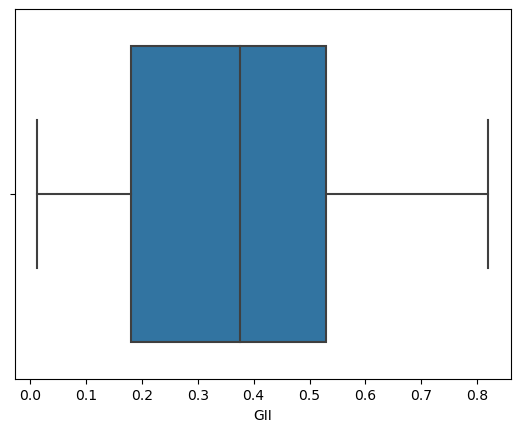

In [103]:
sns.boxplot(df['GII'])
plt.show()

No outliers present in 'GII' column.

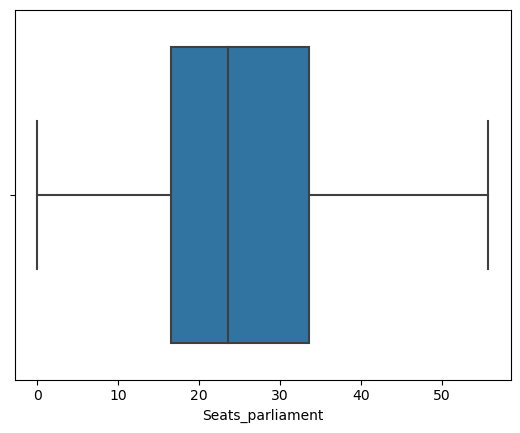

In [6]:
sns.boxplot(df['Seats_parliament'])
plt.show()

No outliers present in ' Seats_parliament ' column.

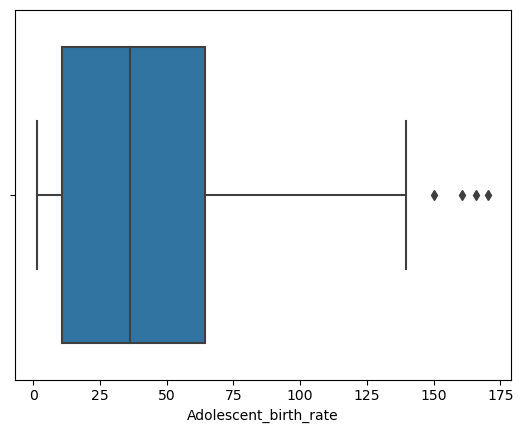

In [8]:
sns.boxplot(df['Adolescent_birth_rate'])
plt.show()

4 outliers present in ' Adolescent_birth_rate ' column.

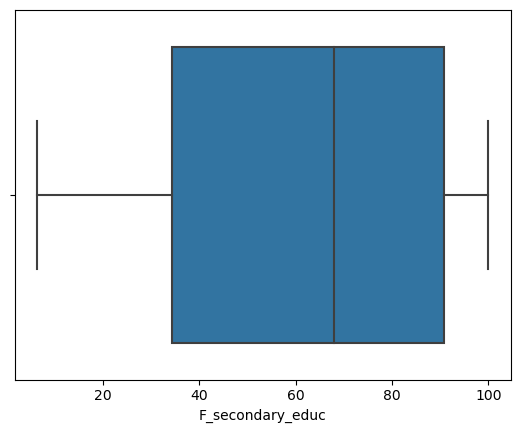

In [106]:
sns.boxplot(df['F_secondary_educ'])
plt.show()

No outliers present in 'F_secondary_educ ' column.

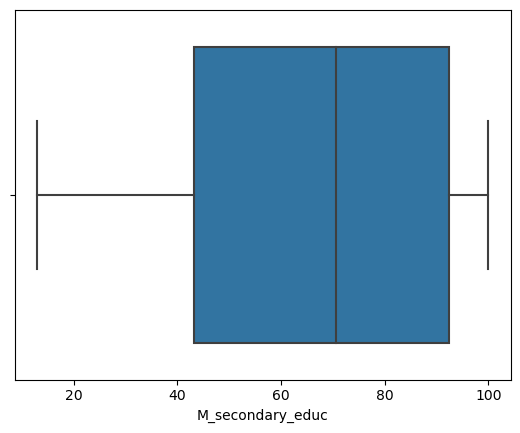

In [107]:
sns.boxplot(df['M_secondary_educ'])
plt.show()

 No outliers present in ' M_secondary_educ ' column.

#### Let's check for 'Multicollinearity.
- Multicollinearity occurs when two or more independent variables(also known as predictor) are highly correlated with one another in a regression model.
- For better model analysis lesser multicollinearity should be preffered.

In [108]:
df.corr()

,GII,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
GII,1.000000,0.691997,0.767823,-0.445748,-0.802603,-0.780010,-0.088174,0.112452
Maternal_mortality,0.691997,1.000000,0.743681,-0.151518,-0.679771,-0.632421,0.189411,0.059952
Adolescent_birth_rate,0.767823,0.743681,1.000000,-0.127165,-0.681330,-0.656012,0.203686,0.200212
Seats_parliament,-0.445748,-0.151518,-0.127165,1.000000,0.184868,0.183333,0.245677,-0.005062
F_secondary_educ,-0.802603,-0.679771,-0.681330,0.184868,1.000000,0.974130,-0.097199,-0.198400
M_secondary_educ,-0.780010,-0.632421,-0.656012,0.183333,0.974130,1.000000,-0.085912,-0.213496
F_Labour_force,-0.088174,0.189411,0.203686,0.245677,-0.097199,-0.085912,1.000000,0.484295
M_Labour_force,0.112452,0.059952,0.200212,-0.005062,-0.198400,-0.213496,0.484295,1.000000


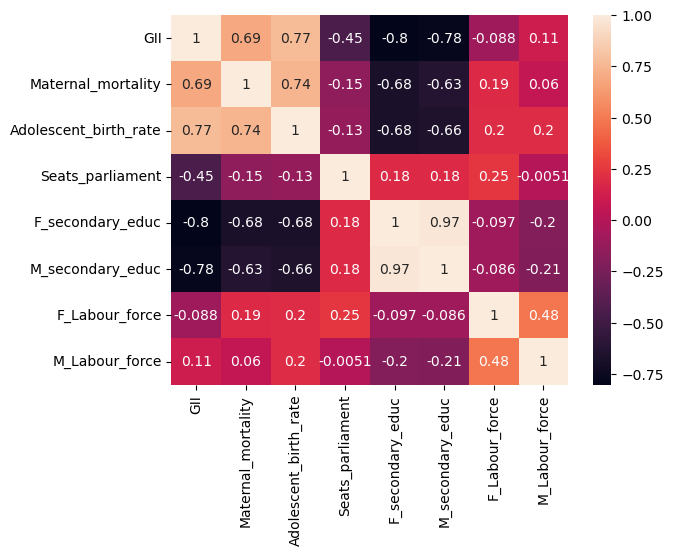

In [128]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Here, we can see, abouve Heatmap shows, there is much less correlation is present between the attibutes of GII.                                                                                                                                                                                            
so here multicollinearity is also low, so we can say that model can be go for the further process of the multiple linear regression

#### Visualization
After exploring data start the visualization of dataset.                                                                                                                                                       
Find the relationship between the columns present in the data.

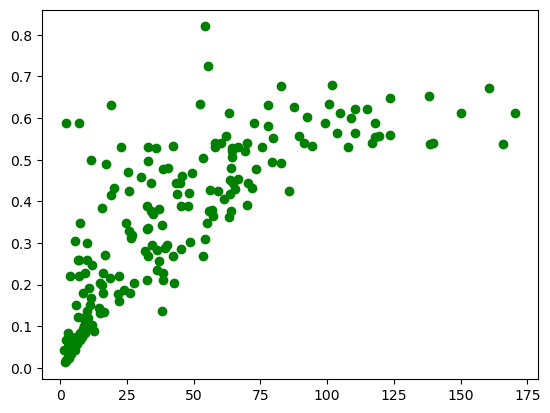

In [110]:
plt.scatter(x='Adolescent_birth_rate',y='GII',data=df,color='green')
plt.show()

The graph shows the value of 'Adolescent_birth_rate' are varies with respect to 'GII'.

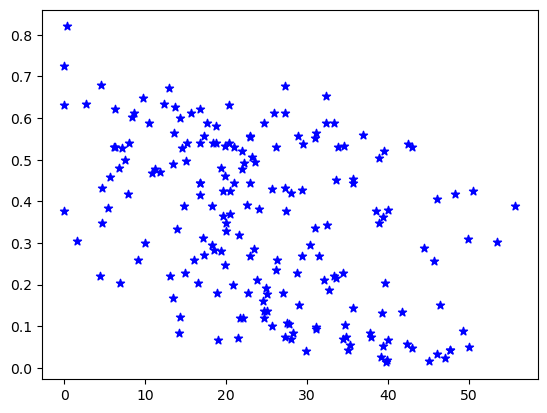

In [112]:
plt.scatter('Seats_parliament','GII',data=df,color='blue',marker='*')
plt.show()

The graph shows the value of 'Seats_parliament' are varies with respect to 'GII'.

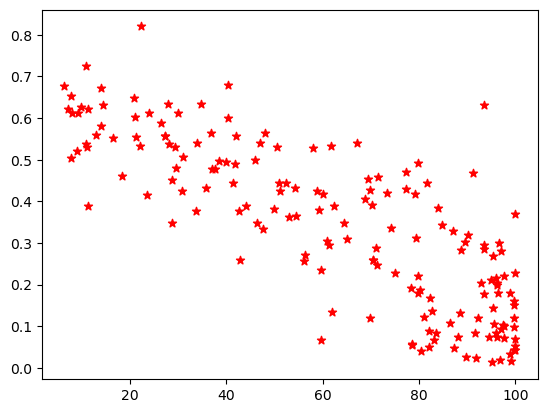

In [11]:
plt.scatter('F_secondary_educ','GII',data=df,color='red',marker='*')
plt.show()

The graph shows the value of 'F_secondary_educ' are varies with respect to 'GII'.

### Multiple Linear Regression
- Multiple linear regression is a regression model that estimates the relationship between two or more independent variables and one dependent variable using a straight line.
- All variables should be quantitative.

In [166]:
from sklearn.linear_model import LinearRegression

In [282]:
model=LinearRegression()
model

LinearRegression()

#### prepare x and y
The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays. However, X can be a dataframe as Pandas is built over NumPy.

In [175]:
x=df.drop(['GII','Maternal_mortality'],axis=1)
x

,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,2.2,39.8,96.9,97.5,61.7,72.7
1,2.3,45.0,99.1,99.3,60.3,72.0
2,5.4,47.6,99.8,99.7,61.7,70.5
3,1.6,47.6,77.1,83.4,53.5,65.8
4,8.1,37.9,94.6,94.4,61.1,70.5
...,...,...,...,...,...,...
190,99.2,32.3,26.5,36.4,70.4,73.6
191,2.3,17.6,26.5,36.4,77.2,86.1
192,7.2,33.3,26.5,36.4,20.9,47.0
193,72.5,10.5,26.5,36.4,20.9,47.0


In [176]:
y=df.GII
y

0      0.018
1      0.016
2      0.043
3      0.043
4      0.073
       ...  
190    0.587
191    0.587
192    0.587
193    0.587
194    0.587
Name: GII, Length: 195, dtype: float64

In [177]:
model=LinearRegression()
model

LinearRegression()

#### Fit the linear model.

In [178]:
model.fit(x,y)

LinearRegression()

#### Predict using the linear mode.

In [181]:
model.predict([[8.1,37.9,94.6,94.4,61.1,70.5]])

array([0.0891549])

In [182]:
model.predict([[72.5,10.5,26.5,36.4,20.9,47.0]])

array([0.62991289])

#### Find the estimated coefficient of model

In [183]:
model.coef_

array([ 0.00230733, -0.00412396, -0.00311273,  0.00012178, -0.00196953,
        0.00020935])

#### Find the intercept of the model

In [184]:
model.intercept_

0.6153111401009588

#### cross checking of the regession model

In [185]:
8.1*0.00230733+37.9*-0.00412396+94.6*-0.00311273+94.4*0.00012178+61.1*-0.00196953+70.5*0.00020935+0.6153111401009588

0.08915509510095876

Here, model using scikit-learn library gives the same value we calculated by mannually.

#### Now, check for the accuracy

In [186]:
model.score(x,y)*100

84.93952540724263

##### Accuracy of given model is 84.93% which can be consider as high.

Simple Linear Regression is done. Now build model of regression by using Train-Test-Split Method

In [204]:
df

,GII,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,0.018,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,0.016,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,0.043,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,0.043,4.0,1.6,47.6,77.1,83.4,53.5,65.8
4,0.073,6.0,8.1,37.9,94.6,94.4,61.1,70.5
...,...,...,...,...,...,...,...,...
190,0.587,1150.0,99.2,32.3,26.5,36.4,70.4,73.6
191,0.587,89.0,2.3,17.6,26.5,36.4,77.2,86.1
192,0.587,89.0,7.2,33.3,26.5,36.4,20.9,47.0
193,0.587,89.0,72.5,10.5,26.5,36.4,20.9,47.0


### Train-Test-Split Method
Train Dataset: Used to fit the machine learning model.                                                 
Test Dataset: Used to evaluate the fit machine learning model.

#### Prepare X and y

In [257]:
X=df.drop(['GII','Maternal_mortality'],axis=1)
X

,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,2.2,39.8,96.9,97.5,61.7,72.7
1,2.3,45.0,99.1,99.3,60.3,72.0
2,5.4,47.6,99.8,99.7,61.7,70.5
3,1.6,47.6,77.1,83.4,53.5,65.8
4,8.1,37.9,94.6,94.4,61.1,70.5
...,...,...,...,...,...,...
190,99.2,32.3,26.5,36.4,70.4,73.6
191,2.3,17.6,26.5,36.4,77.2,86.1
192,7.2,33.3,26.5,36.4,20.9,47.0
193,72.5,10.5,26.5,36.4,20.9,47.0


In [246]:
y=df.GII
y

0      0.018
1      0.016
2      0.043
3      0.043
4      0.073
       ...  
190    0.587
191    0.587
192    0.587
193    0.587
194    0.587
Name: GII, Length: 195, dtype: float64

In [281]:
from sklearn.model_selection import train_test_split

#### Apply train, test to x and y
Here we are using training set with the size of 0.66 (66 percent) means that the remainder percentage 0.33 (33 percent) is assigned to the test set.

In [258]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

#### Print the shape of train and test.

In [259]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(130, 6)
(130,)
(65, 6)
(65,)


#### Start applying regression model to train test data.

In [260]:
from sklearn.linear_model import LinearRegression

In [261]:
model=LinearRegression()

#### Fit the model

In [262]:
model.fit(x_train,y_train)

LinearRegression()

#### Let's predict the values.

In [263]:
y_predict=model.predict(x_test)
y_predict

array([0.15774685, 0.15320567, 0.14793318, 0.38738544, 0.24717321,
       0.34241943, 0.23137656, 0.10126864, 0.56167774, 0.26698054,
       0.20944951, 0.41335357, 0.05838181, 0.08726722, 0.61098553,
       0.30696481, 0.60226635, 0.33319087, 0.50047002, 0.19133673,
       0.41995723, 0.49496872, 0.232548  , 0.09681485, 0.1987911 ,
       0.43437225, 0.10420202, 0.65000511, 0.12307763, 0.30289596,
       0.60141921, 0.19549195, 0.54222932, 0.2251821 , 0.37093759,
       0.0762859 , 0.09741954, 0.49475023, 0.52246568, 0.64693046,
       0.10196637, 0.15555027, 0.34001919, 0.30860134, 0.29134828,
       0.42302131, 0.11965789, 0.56714282, 0.69815178, 0.56479669,
       0.11943459, 0.40326848, 0.38234254, 0.45946146, 0.18076131,
       0.30238091, 0.28338104, 0.52408751, 0.7801778 , 0.4186129 ,
       0.6081034 , 0.33426131, 0.24407768, 0.24034369, 0.16887284])

In [264]:
y_test

21     0.083
30     0.100
26     0.057
60     0.392
28     0.123
       ...  
180    0.633
63     0.347
77     0.134
56     0.344
23     0.071
Name: GII, Length: 65, dtype: float64

#### Data frame after train test is as

In [265]:
new_df=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
new_df

,Actual,Predicted
21,0.083,0.157747
30,0.100,0.153206
26,0.057,0.147933
60,0.392,0.387385
28,0.123,0.247173
...,...,...
180,0.633,0.608103
63,0.347,0.334261
77,0.134,0.244078
56,0.344,0.240344


In [266]:
x_pred=model.predict(x_train)
x_pred

array([0.24953128, 0.68260051, 0.39487875, 0.24335984, 0.64219527,
       0.24801981, 0.349779  , 0.44796789, 0.17220812, 0.4671044 ,
       0.05106536, 0.34848727, 0.12172788, 0.465502  , 0.21511507,
       0.51528315, 0.6248448 , 0.28010589, 0.27403713, 0.45555795,
       0.75406794, 0.42503319, 0.27720496, 0.66890806, 0.34275386,
       0.34602802, 0.15697596, 0.61689623, 0.20482618, 0.4599052 ,
       0.59037089, 0.41662007, 0.16184402, 0.71601451, 0.51697086,
       0.54833285, 0.41571493, 0.53094152, 0.28420021, 0.39434331,
       0.28054101, 0.36326474, 0.36654685, 0.20761993, 0.16375845,
       0.23124782, 0.34131003, 0.67155989, 0.44951752, 0.62103261,
       0.04294735, 0.60259354, 0.65888194, 0.18649532, 0.12790012,
       0.08832418, 0.32055615, 0.52692577, 0.26224164, 0.38865911,
       0.52021723, 0.26506828, 0.23237816, 0.52151087, 0.41858412,
       0.45423554, 0.37619367, 0.62986581, 0.51419433, 0.43014566,
       0.35311149, 0.12460551, 0.52352074, 0.16967848, 0.43596

#### Find mean squared error
The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss.

In [268]:
from sklearn.metrics import mean_squared_error

In [269]:
mean_squared_error(y_test, y_predict)

0.004382764543381089

In [270]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.06620245118861603

#### Find mean absolute error
It is the magnitude of difference between the prediction of an observation and the true value of that observation.

In [271]:
from sklearn.metrics import mean_absolute_error

In [272]:
mean_absolute_error(y_test, y_predict)

0.05619355992360332

#### Find R squared score
It is proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [273]:
from sklearn.metrics import r2_score

In [274]:
r2_score(y_test, y_predict)

0.8976855307852214

#### Find accuracy of model

In [275]:
accuracy=r2_score(y_test,y_predict)*100
accuracy

89.76855307852215

In [278]:
model.score(x_train,y_train)*100

81.21043468250286

In [279]:
model.score(x_test,y_test)*100

89.76855307852215

The accuracy of model is 89% it is consider as strong relation between the GII and its attributes.

### Final Conclusion
1. 'Gender Inequality Index' data shows higher accurary of 89% for multiple linear regression analysis.
2. Train-Test-Split method of regression is highly suited for this data.
3. After looking to the accuracy we can say that data may be of poor quality or insufficent